<a href="https://colab.research.google.com/github/constanamurrio/neural_networks/blob/main/Original_1_mlp_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BASIC MNIST EXAMPLE WITH MLP**

Imports...

In [ ]:
!nvidia-smi

Mon Nov 28 17:25:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

Define batch size, number of epochs and number of classes


In [ ]:
batch_size = 128 
epochs = 25
num_classes=10 #Del 0 al 9

Load MNIST and transform

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Tiene acceso directo a la base de datos. 

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784) # El tensor lo pasamos a dos dimensiones con el reshape de Numpy. Primero las muestras y luego la dimensionalidad propia de los objetos. 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)


Define the NN topology, a sequential model with 2 hidden layers

In [ ]:
model = Sequential() #Creamos la red neuronal. Es secuencial, una capa tras otra. 
model.add(Dense(512, activation='relu', input_shape=(784,))) #Capa de entrada con la dimensionalidad de entrada. 
model.add(Dense(512, activation='relu')). #Capa oculta. 
model.add(Dense(num_classes, activation='softmax')) #Capa de salida

model.summary()

#Param # incluye la dimensionalidad de entrada más el bias (784 x 512 + bias)
#Hay capas que puede tener parámetros que no se entrenan


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Define an optimizer 

In [ ]:
sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)
#Optimizador y función de pérdida
#sdf es Stocastic Gradient Descent

Compile the model, define loss and link the optimizer

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#Accuracy es un indicador del acierto. 
#No usamos directamente el error porque la deriva del máximo (el que gana) no existe. 

Finally, train the model and evaluate over the test data

In [ ]:
#Meter el history en el pdf de la entrega. 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, #Que pinte cómo va evolucionando el error
                    validation_data=(x_test, y_test))

# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 4s 4ms/step - loss: 0.4355 - accuracy: 0.8792 - val_loss: 0.2200 - val_accuracy: 0.9372
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1948 - accuracy: 0.9445 - val_loss: 0.1564 - val_accuracy: 0.9552
Epoch 3/25
469/469 [==============================] - 2s 3ms/step - loss: 0.1410 - accuracy: 0.9596 - val_loss: 0.1278 - val_accuracy: 0.9620
Epoch 4/25
469/469 [==============================] - 2s 3ms/step - loss: 0.1115 - accuracy: 0.9676 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 5/25
469/469 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.9741 - val_loss: 0.0960 - val_accuracy: 0.9715
Epoch 6/25
469/469 [==============================] - 2s 3ms/step - loss: 0.0748 - accuracy: 0.9787 - val_loss: 0.0836 - val_accuracy: 0.9744
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0635 - accuracy: 0.9820 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt



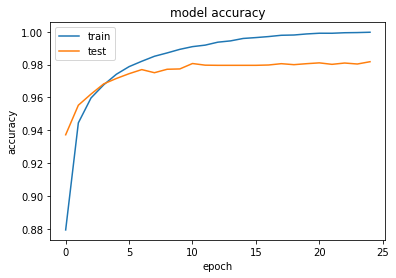

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#La diferencia al final de la línea train y test indica overfitting. 
#El train siempre llega casi al 100 %.
#En test cuesta más. 